In [33]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd
import xlrd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [34]:
train_df = pd.read_excel('./Copy of Daily routine and Productivity (Responses).xlsx')

In [35]:
train_df.head()

,what is your birth year,What do you do?,How happy or satisfied you are with yourself.,"Success can be large things as well as can be found in little things like keeping promises to yourself, helping someone,a small progress to your long journey or having a peaceful day, So how much do you think you are successful in life?","Chaotic to highly structural, please rate yourself. (completely chaotic means 1, highly disciplined means 10)",Do you have any morning routine?,"How frequently do you do any physical activites like outdoor sports, yoga or work out?",How frequently do you do meditation?,"When you exercise or meditate, do you feel your productivity increased?",How much time do you spend in leisure?,What do you think about making to-do list in every morning and stick to that.,Do you have a routine?,What is your favourite way to consume content?,What is life for you?,Are you good at taking decisions in general? (They need not to be right or wrong decision)
0,2000,Student,5,4,4,Yes,rarely,never,No,3-5 hours,I like to be spontenious.,"Yes, but I often fail to follow it.",Blogs,A journey to enjoy,I need lot of time to think about all the cons...
1,2000,Student,5,5,4,Yes,rarely,never,Yes,< 1 hour,To-do list works great for me,"Yes, a strict routine and I follow it.",YouTube,A journey to enjoy,"Yes, it is easy."
2,2022,Student,5,4,4,No,Regularly,never,I don't know,< 1 hour,I like to be spontenious.,I don't like routine.,YouTube,A journey to enjoy,I need lot of time to think about all the cons...
3,2000,Student,5,4,3,No,rarely,never,Yes,5-8 hours,I like to be spontenious.,"No, I don't need one.",YouTube,A journey to enjoy,"No, I am always confused."
4,2001,retired,5,4,4,Yes,rarely,never,I don't know,>8hours,I waste more time in making the list and plann...,"Yes, but I often fail to follow it.",YouTube,A mission to complete,I need lot of time to think about all the cons...


In [36]:
print(train_df.columns.values)

['what is your birth year' 'What do you do?'
 'How happy or satisfied you are with yourself.'
 'Success can be large things as well as can be found in little things like keeping promises to yourself, helping someone,a  small progress to your long journey or having a peaceful day, So how much do you think you are successful in life?'
 'Chaotic to highly structural, please rate yourself. (completely chaotic means 1, highly disciplined means 10)'
 'Do you have any morning routine?'
 'How frequently do you do any physical activites like outdoor sports, yoga or work out?'
 'How frequently do you do meditation? '
 'When you exercise or meditate, do you feel your productivity increased?'
 'How much time do you spend in leisure?'
 'What do you think about making to-do list in every morning and stick to that.'
 'Do you have a routine?' 'What is your favourite way to consume content?'
 'What is life for you?'
 'Are you good at taking decisions in general? (They need not to be right or wrong deci

In [37]:
# train_df.drop(['Timestamp', 'Email Address', 'What is your name?', 
#  'What is your phone number?'], inplace=True, axis=1)

In [38]:
dict = {
    'what is your birth year': 'birth_year',
 'what is your gender?':'gender',
 'What do you do?':'work',
 'What is your usual wakeup time?':'wakeup',
  'when do you usually sleep?':'sleep',
 'How happy or satisfied you are with yourself.':'happy',
 'Success can be large things as well as can be found in little things like keeping promises to yourself, helping someone,a  small progress to your long journey or having a peaceful day, So how much do you think you are successful in life?':'success',
 'Chaotic to highly structural, please rate yourself. (completely chaotic means 1, highly disciplined means 10)':'discipline',
 'Do you have any morning routine?':'morning_routine',
 'How frequently do you do any physical activites like outdoor sports, yoga or work out?':'physical_activites',
 'How frequently do you do meditation? ':'meditation',
 'When you exercise or meditate, do you feel your productivity increased?':'productivity_increased',
 'How much time do you spend in leisure?':'leisure',
 'What do you think about making to-do list in every morning and stick to that.':'todo_list',
 'Do you have a routine?' 'What is your favourite way to consume content?':'favourite_way_to_consume_content',
 'What kind of content do you like most?' 'What is life for you?':'life',
 'Are you good at taking decisions in general? (They need not to be right or wrong decision)':'decision_making',
 'Are they good decisions?':'good_decisions',
 'Do you have a routine?':'routine',
 'What is your favourite way to consume content?':'favourite_way_to_consume_content',
 'What kind of content do you like most?':'kind_of_content',
 'What is life for you?':'life',
 
}

In [39]:
train_df.rename(columns=dict, inplace=True)

In [40]:
train_df.head()

,birth_year,work,happy,success,discipline,morning_routine,physical_activites,meditation,productivity_increased,leisure,todo_list,routine,favourite_way_to_consume_content,life,decision_making
0,2000,Student,5,4,4,Yes,rarely,never,No,3-5 hours,I like to be spontenious.,"Yes, but I often fail to follow it.",Blogs,A journey to enjoy,I need lot of time to think about all the cons...
1,2000,Student,5,5,4,Yes,rarely,never,Yes,< 1 hour,To-do list works great for me,"Yes, a strict routine and I follow it.",YouTube,A journey to enjoy,"Yes, it is easy."
2,2022,Student,5,4,4,No,Regularly,never,I don't know,< 1 hour,I like to be spontenious.,I don't like routine.,YouTube,A journey to enjoy,I need lot of time to think about all the cons...
3,2000,Student,5,4,3,No,rarely,never,Yes,5-8 hours,I like to be spontenious.,"No, I don't need one.",YouTube,A journey to enjoy,"No, I am always confused."
4,2001,retired,5,4,4,Yes,rarely,never,I don't know,>8hours,I waste more time in making the list and plann...,"Yes, but I often fail to follow it.",YouTube,A mission to complete,I need lot of time to think about all the cons...


In [41]:
def yearToage(x):
    return 2022 - x
train_df['birth_year'] = train_df['birth_year'].apply(yearToage)

In [42]:
# train_df.drop('birth_year', axis=1, inplace=True)
train_df.drop('work', axis=1, inplace=True)

In [43]:
def lam(x, dic):
    try:
        return dic[x]
    except:
        return 999
def encoding(data, col, dic):
    print(col, dic)
    data[col] = data[col].apply(lambda x: lam(x, dic))
    return data
def mapping(data, col):
    lis = data[col].unique()
    ans={}
    for i in range(len(lis)):
        ans[lis[i]] = i
    return encoding(data, col, ans)
for i in train_df.columns:
    train_df = mapping(train_df, i)

birth_year {22: 0, 0: 1, 21: 2, 24: 3, 23: 4, 20: 5, 30: 6, 27: 7, 15: 8}
happy {5: 0, 4: 1, 3: 2, 2: 3, 1: 4}
success {4: 0, 5: 1, 3: 2, 2: 3, 1: 4}
discipline {4: 0, 3: 1, 5: 2, 1: 3, 2: 4}
morning_routine {'Yes': 0, 'No': 1}
physical_activites {'rarely': 0, 'Regularly': 1, '3-4 times a week': 2, 'never': 3, '1-2 times a week': 4}
meditation {'never': 0, 'Daily': 1, '3-4 times a week': 2, '1-2 times a week': 3}
productivity_increased {'No': 0, 'Yes': 1, "I don't know": 2, "I don't practice either": 3}
leisure {'3-5 hours': 0, '< 1 hour': 1, '5-8 hours': 2, '>8hours': 3, '1-3 hours': 4}
todo_list {'I like to be spontenious.': 0, 'To-do list works great for me': 1, 'I waste more time in making the list and planning than accomplishing them.': 2}
routine {'Yes, but I often fail to follow it.': 0, 'Yes, a strict routine and I follow it.': 1, "I don't like routine.": 2, "No, I don't need one.": 3}
favourite_way_to_consume_content {'Blogs': 0, 'YouTube': 1, 'Reading': 2, 'Movies': 3, 'T.V':

<AxesSubplot:>

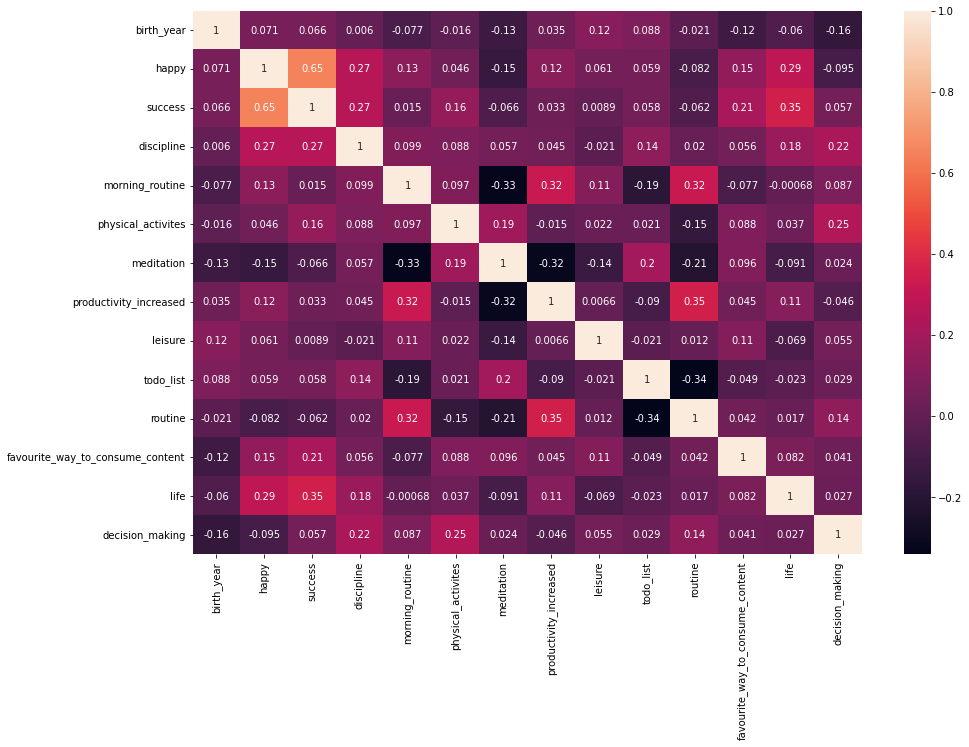

In [44]:
# Creating the correaltion matrix
corr = train_df.corr()
# Plotting the correlation matrix on a heatmap
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(corr, annot=True)
# ax.set_xticklabels(ax.get_xticklabels(), rotation=45);
# plt.show()

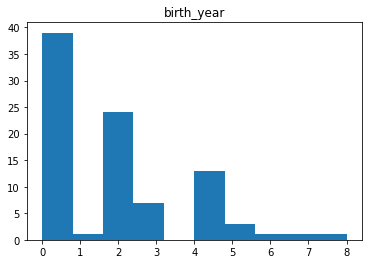

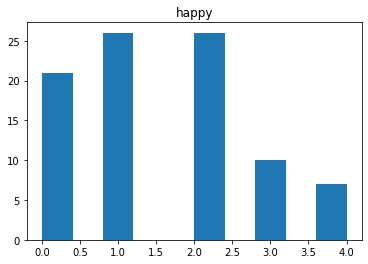

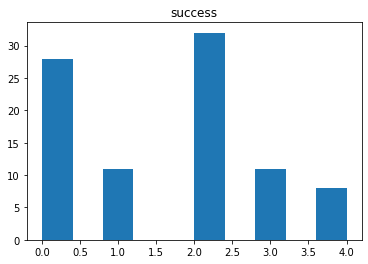

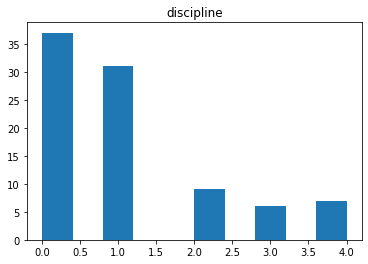

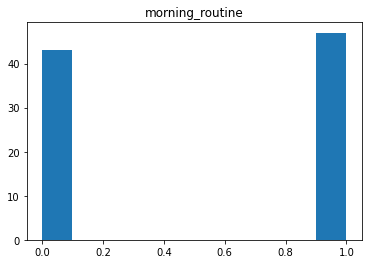

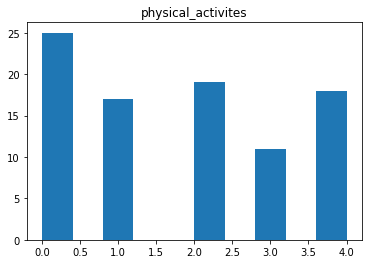

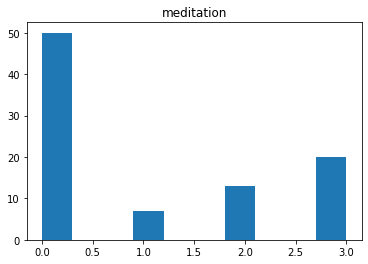

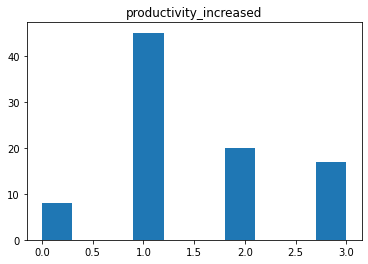

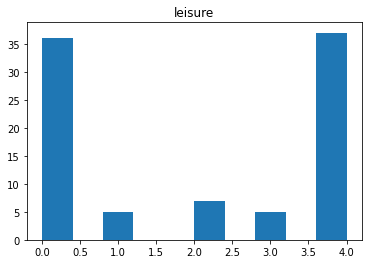

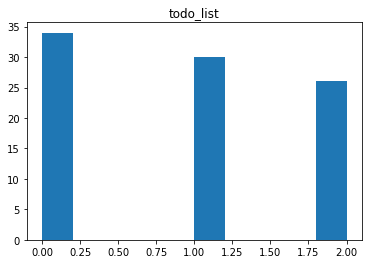

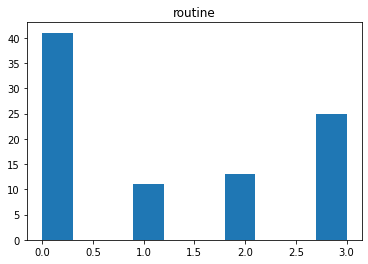

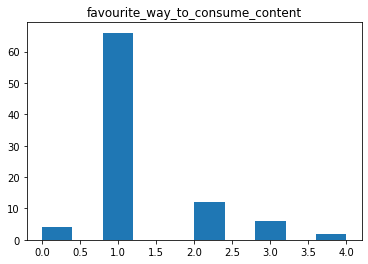

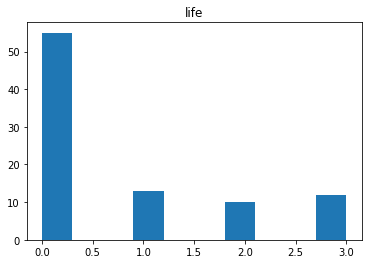

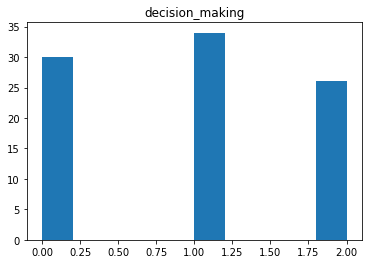

In [45]:
for i in train_df.columns:
    if(i=="wakeup" or i=="sleep"): 
        continue
    plt.hist(train_df[i])
    plt.title(i)
    plt.show()

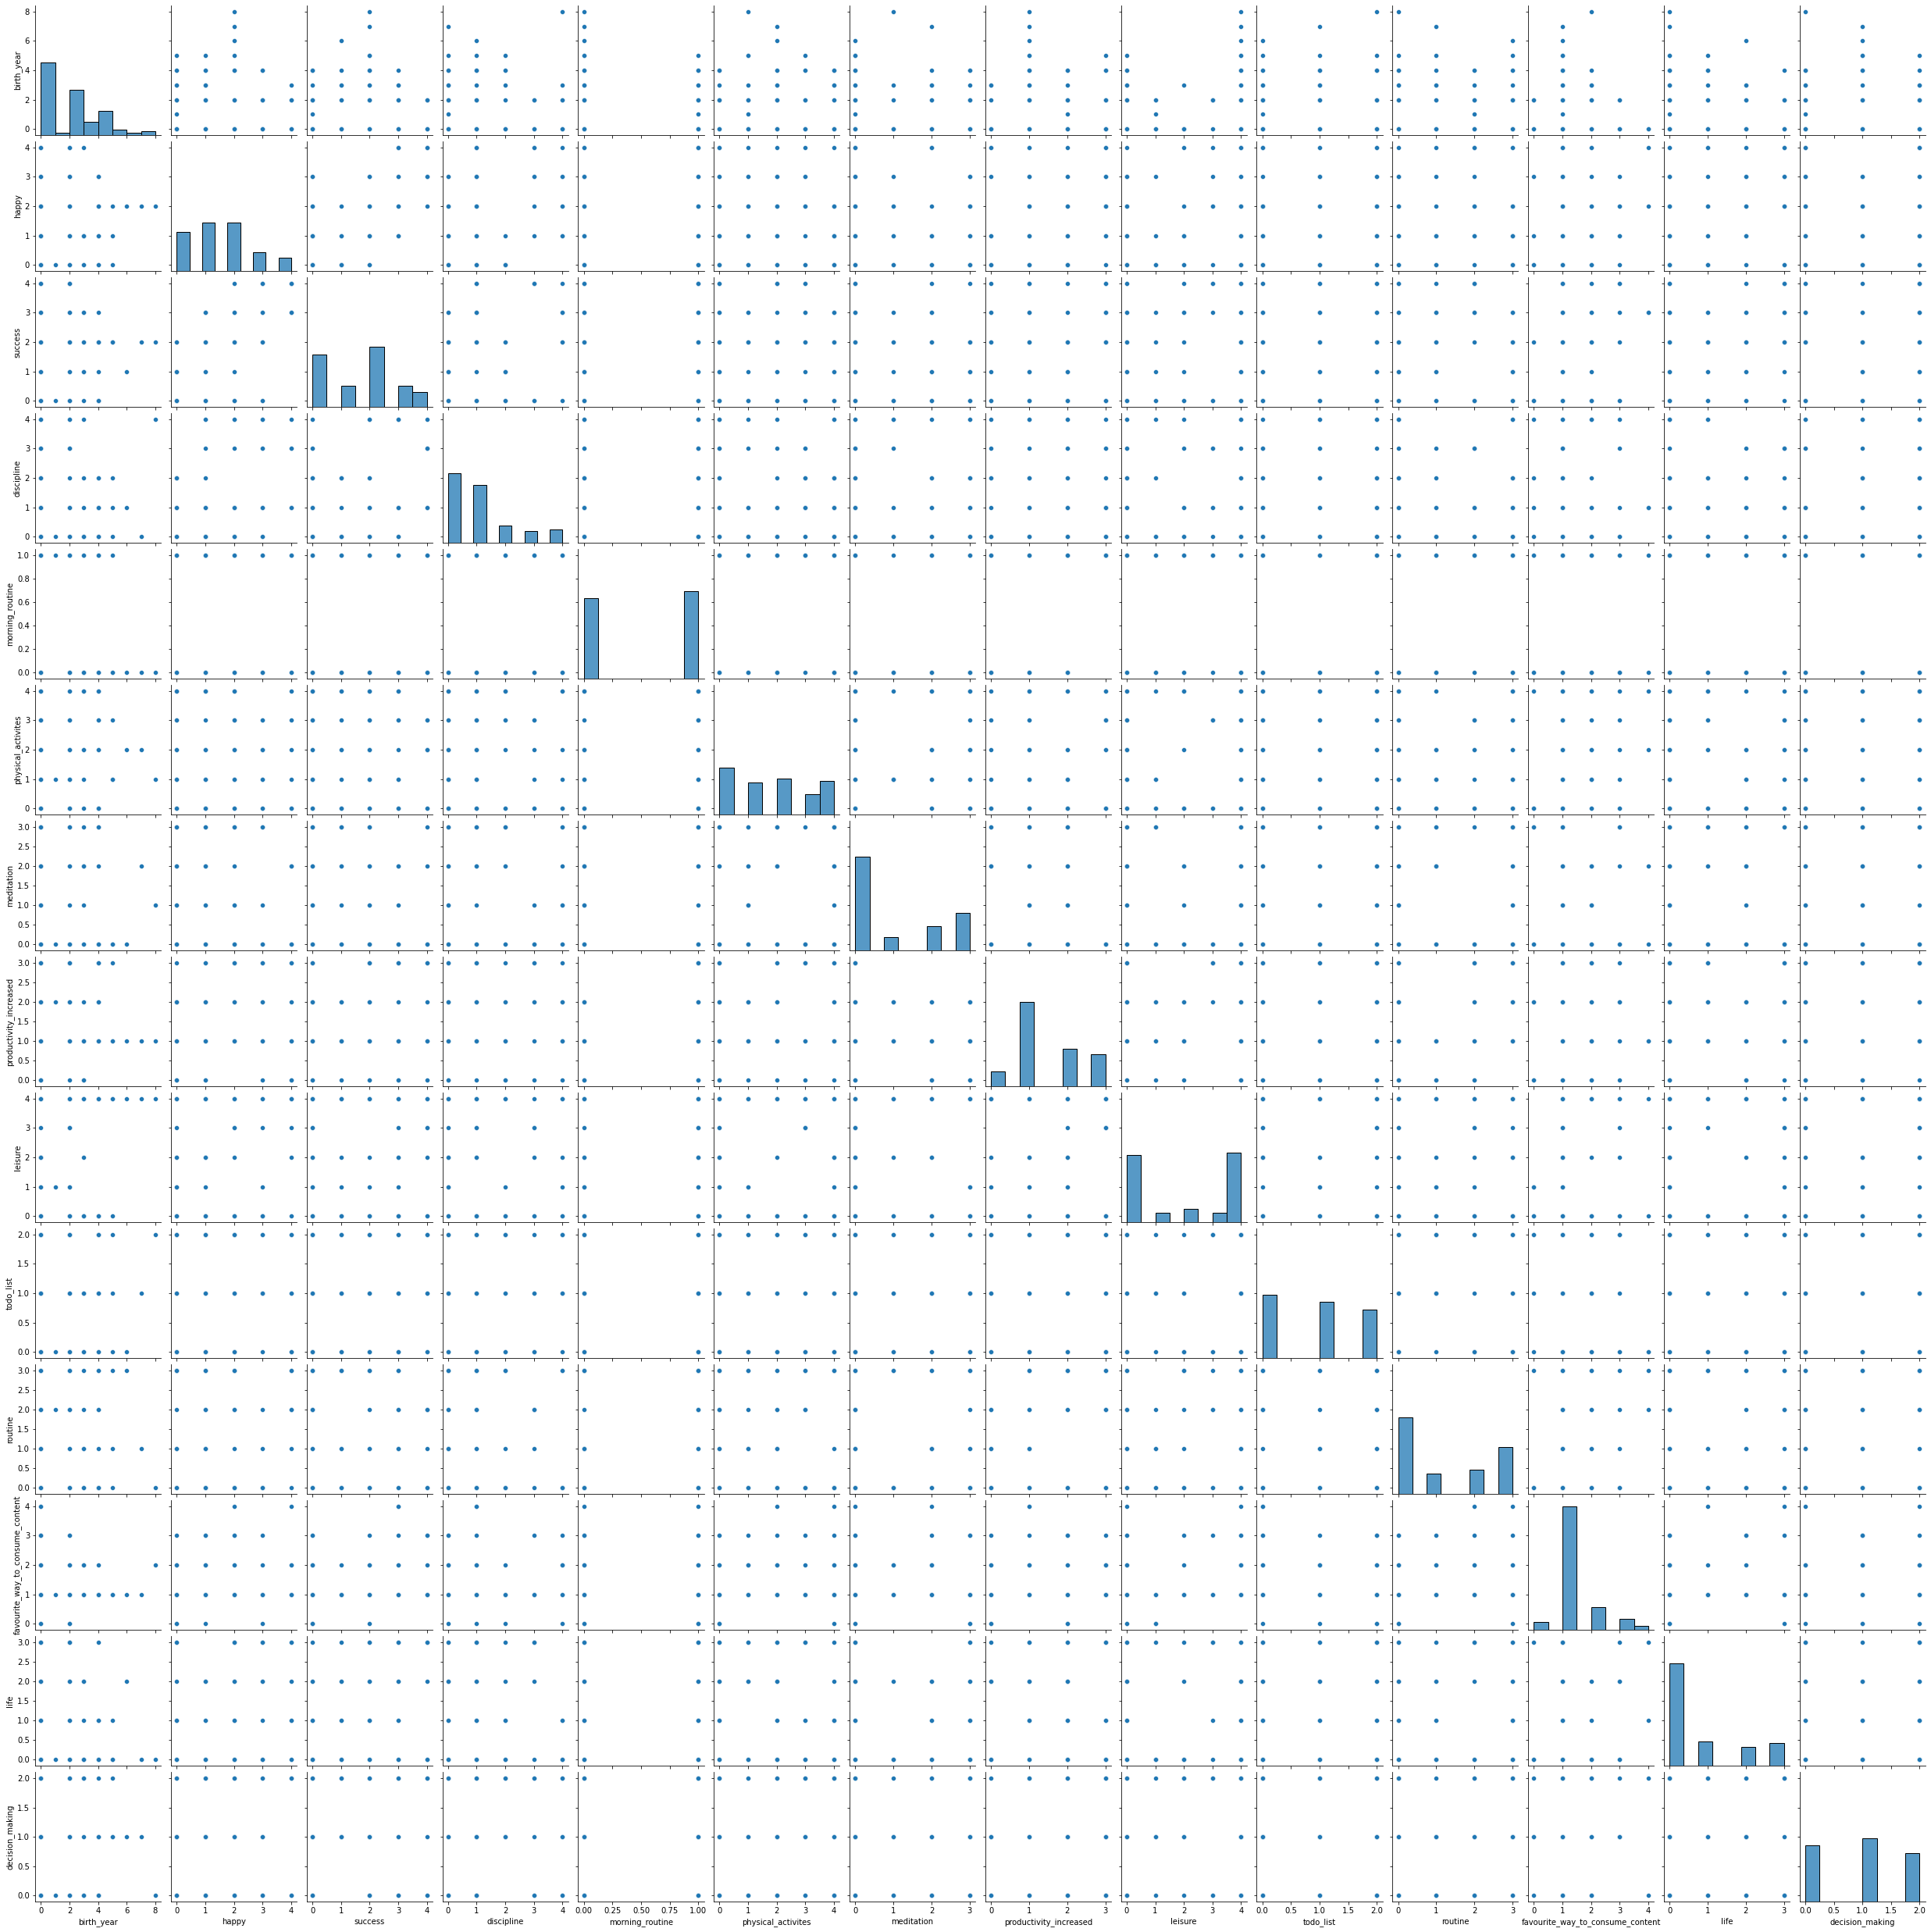

In [46]:
sns.pairplot(train_df)

In [47]:
train_df.head()

,birth_year,happy,success,discipline,morning_routine,physical_activites,meditation,productivity_increased,leisure,todo_list,routine,favourite_way_to_consume_content,life,decision_making
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,1,1,1,1,1,0,1
2,1,0,0,0,1,1,0,2,1,0,2,1,0,0
3,0,0,0,1,1,0,0,1,2,0,3,1,0,2
4,2,0,0,0,0,0,0,2,3,2,0,1,1,0
